In [1]:
import string
import unicodedata
import codecs
import numpy as np
from textblob import TextBlob as tb
import nltk
from textblob import TextBlob as tb
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt

def load(text):
    #open the text file
    #converting the file from unicode to ascii
    with codecs.open(str(text),
                 "r",encoding='utf-8', errors='replace') as speech:
        raw=speech.read().lower()
        raw_asc = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')
        sent = sent_tokenize(raw_asc)
    return sent

def loadWord(text):
    #open the text file
    #converting the file from unicode to ascii
    with codecs.open(str(text),
                 "r",encoding='utf-8', errors='replace') as speech:
        raw=speech.read().lower()
        raw_asc = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')
        sent = word_tokenize(raw_asc)
    return sent

def preprocess(text):
    #open the text file
    #converting the file from unicode to ascii
    with codecs.open(str(text),
                 "r",encoding='utf-8', errors='replace') as speech:
        raw=speech.read()
        raw_asc = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')

    #removing puncutation
    tokenizer = RegexpTokenizer(r'\w+')
    #tokens = sent_tokenize(raw_asc)
    tokens = tokenizer.tokenize(raw_asc)
    #print 'remove punctuation'

    #make everything lowercase
    tokens = [token.lower() for token in tokens]
    all_text = nltk.Text(tokens)
    #print 'All lowercase'

    #removing stopwords and audience responses
    stopset = (stopwords.words('english') + ["[applause]","[laughter]","[boos]","applause"])
    clean = [word for word in all_text if word not in stopset]
    #print 'removed stopwords and audience response'

    return clean


# returns list of sentences that include the subject
def TopicList(candidate, subject):
    
    topic = str(subject).lower()

    top = []
    for i in range(len(candidate)):
        for j in range(len(candidate[i])):
            search = topic
            if search in candidate[i][j]:
                top.append(candidate[i][j])
    return top


#counts the total number of negative, postive, and neutral refrences to a subject
def PolarityCount(candidate,subject):

    #all lower case to avoid case sensitive search 
    topic = str(subject).lower()

    top = []
    for i in range(len(candidate)):
        for j in range(len(candidate[i])):
            search = topic
            if search in candidate[i][j]:
                top.append(candidate[i][j])
     
    #subjectivity threshold
    sta = 0
        
    pos = []
    neg = []
    nu = []

    for i in range(len(top)):
    
        if (tb(str(top[i])).sentiment.subjectivity) > sta :
        
            if (tb(str(top[i])).sentiment.polarity) > .1:
                pos.append(tb(str(top[i])).sentiment.polarity)
            elif (tb(str(top[i])).sentiment.polarity) < (-.1):
                neg.append(tb(str(top[i])).sentiment.polarity)
            else:
                nu.append(tb(str(top[i])).sentiment.polarity)
        
    return len(neg), len(pos), len(nu)


#graphing the count of the polairty
def GraphPol(topic):

    neg = []
    pos = []
    nu = []


    topic_s = PolarityCount(sanders,str(topic).lower())
    topic_c = PolarityCount(clinton,str(topic).lower())
    topic_t = PolarityCount(trump,str(topic).lower())
    
    neg.append(topic_s[0])
    neg.append(topic_c[0])
    neg.append(topic_t[0])
    pos.append(topic_s[1])
    pos.append(topic_c[1])
    pos.append(topic_t[1])
    nu.append(topic_s[2])
    nu.append(topic_c[2])
    nu.append(topic_t[2])


    N = 3

    ind = np.arange(N)  # the x locations for the groups
    width = .2   # the width of the bars

    fig, ax = plt.subplots()
    negative = ax.bar(ind+width, neg, width, color='r')
    positive = ax.bar(ind+width*2, pos, width, color='b')
    neutral = ax.bar(ind+width*3, nu, width, color='y')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Count')
    ax.set_title('Polarity of references to ' + str(topic))
    ax.set_xticks(ind + width+ .3)
    ax.set_xticklabels(('Sanders', 'Clinton', 'Trump'))

    ax.legend((negative[0], positive[0], neutral[0]), ('Negative', 'Positive','Neutral'),loc = 'best')

    plt.show()
    #plt.savefig(str(topic))
    

###################################################################

#all speeches are in list by sentence. 
sanders = []
trump = []
clinton = []

for i in range(1,25):
    sp = 'Sanders/sanders' + str(i) + '.txt'
    inaug = load(str(sp))
    sanders.append(inaug)
    
for i in range(1,75):
    sp = 'Trump/trump' + str(i) + '.txt'
    inaug = load(str(sp))
    trump.append(inaug)
    
for i in range(1,56):
    sp = 'Clinton/clinton' + str(i) + '.txt'
    inaug = load(str(sp))
    clinton.append(inaug)
    
#all speeches are in list by word. 
sanders_word = []
trump_word = []
clinton_word = []

for i in range(1,25):
    sp = 'Sanders/sanders' + str(i) + '.txt'
    inaug = preprocess(str(sp))
    sanders_word.append(inaug)
    
for i in range(1,75):
    sp = 'Trump/trump' + str(i) + '.txt'
    inaug = preprocess(str(sp))
    trump_word.append(inaug)
    
for i in range(1,56):
    sp = 'Clinton/clinton' + str(i) + '.txt'
    inaug = preprocess(str(sp))
    clinton_word.append(inaug)

print 'speeches loaded'

speeches loaded


In [2]:
#determinig the most frequent words and bigrams for the Sanders speeches

san = []

for i in range(len(sanders_word)):
    for j in range(len(sanders_word[i])):
        san.append(sanders_word[i][j])

s_bigram = ngrams(san,2)

print 'words'
fdist1 = FreqDist(san)
print fdist1.most_common(15)

print 'bigram'
fdist2 = FreqDist(s_bigram)
fdist2.most_common(15)

words
[('people', 655), ('country', 471), ('one', 228), ('going', 220), ('america', 219), ('need', 217), ('campaign', 193), ('know', 192), ('today', 191), ('american', 188), ('percent', 182), ('time', 174), ('must', 169), ('working', 163), ('united', 155)]
bigram


[(('wall', 'street'), 139),
 (('united', 'states'), 117),
 (('health', 'care'), 86),
 (('middle', 'class'), 73),
 (('american', 'people'), 68),
 (('young', 'people'), 64),
 (('country', 'earth'), 44),
 (('years', 'ago'), 44),
 (('people', 'country'), 43),
 (('climate', 'change'), 43),
 (('minimum', 'wage'), 37),
 (('social', 'security'), 37),
 (('millions', 'people'), 36),
 (('major', 'country'), 35),
 (('secretary', 'clinton'), 34)]

In [3]:
#determinig the most frequent words and bigrams for the Clinton speeches

cli = []

for i in range(len(clinton_word)):
    for j in range(len(clinton_word[i])):
        cli.append(clinton_word[i][j])

c_bigram = ngrams(cli,2)

print 'words'
fdist1 = FreqDist(cli)
print fdist1.most_common(15)

print 'bigram'
fdist2 = FreqDist(c_bigram)
fdist2.most_common(15)

words
[('people', 977), ('know', 843), ('want', 823), ('going', 822), ('make', 648), ('get', 610), ('america', 576), ('us', 545), ('country', 535), ('work', 517), ('president', 497), ('one', 476), ('said', 444), ('every', 429), ('think', 424)]
bigram


[(('donald', 'trump'), 266),
 (('make', 'sure'), 168),
 (('united', 'states'), 112),
 (('young', 'people'), 108),
 (('want', 'thank'), 77),
 (('middle', 'class'), 73),
 (('going', 'make'), 69),
 (('president', 'obama'), 68),
 (('climate', 'change'), 65),
 (('secretary', 'state'), 61),
 (('every', 'single'), 59),
 (('new', 'york'), 57),
 (('thank', 'much'), 56),
 (('small', 'businesses'), 54),
 (('small', 'business'), 52)]

In [4]:
#determinig the most frequent words and bigrams for the Trump speeches

tru = []

for i in range(len(trump_word)):
    for j in range(len(trump_word[i])):
        tru.append(trump_word[i][j])

t_bigram = ngrams(tru,2)

print 'words'
fdist1 = FreqDist(tru)
print fdist1.most_common(15)

print 'bigram'
fdist2 = FreqDist(t_bigram)
fdist2.most_common(15)

words
[('going', 1985), ('people', 1429), ('country', 1171), ('clinton', 1095), ('hillary', 1077), ('american', 957), ('jobs', 808), ('one', 805), ('america', 697), ('know', 688), ('great', 666), ('new', 584), ('said', 579), ('make', 569), ('every', 544)]
bigram


[(('hillary', 'clinton'), 765),
 (('united', 'states'), 308),
 (('make', 'america'), 237),
 (('donald', 'trump'), 175),
 (('african', 'american'), 164),
 (('going', 'win'), 121),
 (('american', 'people'), 119),
 (('special', 'interests'), 118),
 (('trump', 'administration'), 112),
 (('president', 'obama'), 108),
 (('inner', 'cities'), 104),
 (('trade', 'deals'), 102),
 (('school', 'choice'), 93),
 (('november', '8th'), 91),
 (('new', 'york'), 90)]

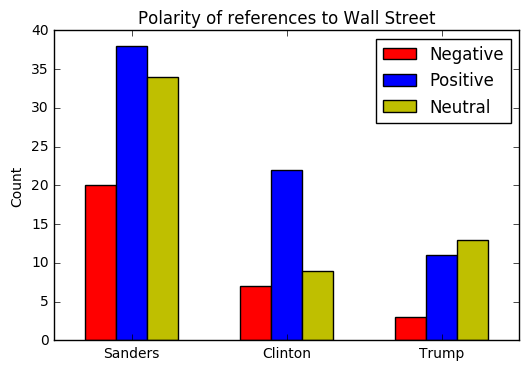

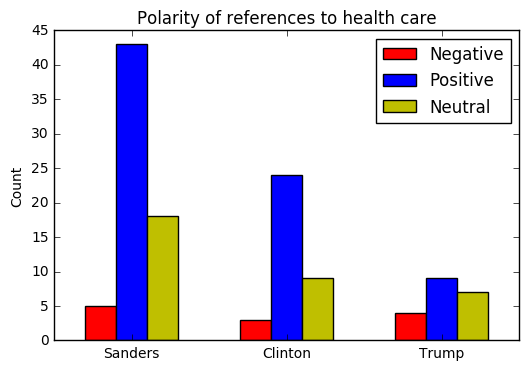

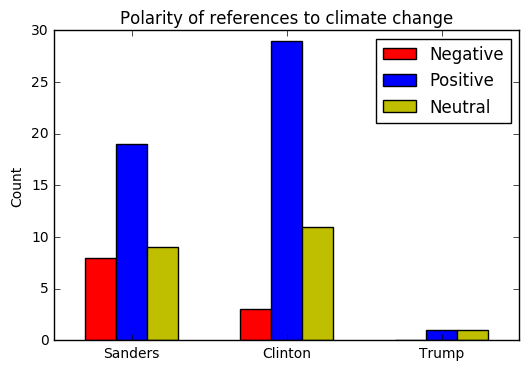

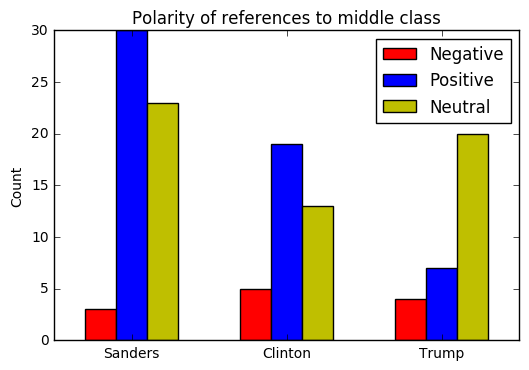

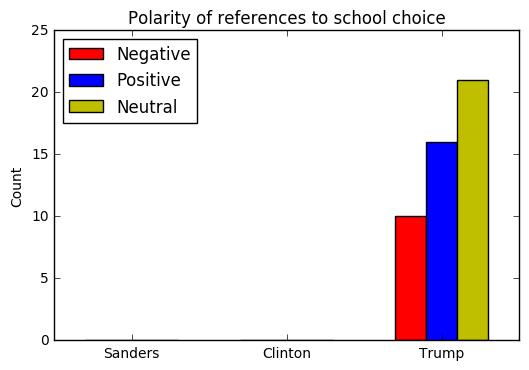

In [5]:
#Graphing common policy topics
GraphPol('Wall Street')
GraphPol('health care')
GraphPol('climate change')
GraphPol('middle class')
GraphPol('school choice')

131
128
reforming wall street: it is time to break up the largest financial institutions in the country.
0.0


wall street cannot continue to be an island unto itself, gambling trillions in risky financial instruments while expecting the public to bail it out.
0.0


we need a banking system which is part of the job creating productive economy, not a handful of huge banks on wall street which engage in reckless and illegal activities.
-0.05


we must also finally address the greed, recklessness and illegal behavior of wall street.
-0.25


in my view, wall street is too large and powerful to be reformed.
0.257142857143


since i have been an elected official, i have used my influence to stand with those who have no power, and to take on virtually every element of our current ruling class  from wall street, to the insurance companies, to the drug companies to big energy, to the koch brothers to the military industrial complex.
-0.1


it is an obscenity that we stigmatize so many young ame

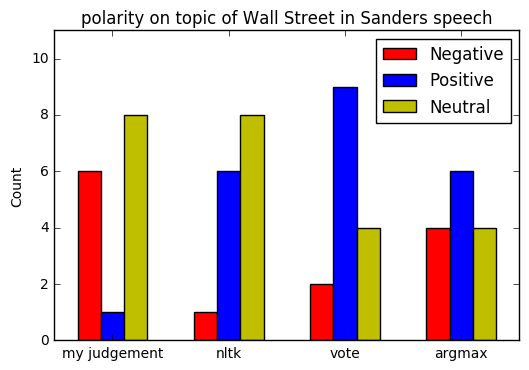

benchmark comparisons of nltk, vote and arg
Correct: 6
Wrong: 9
Correct: 4
Wrong: 11
Correct: 7
Wrong: 8


In [6]:
wall_san = TopicList(sanders, 'wall street')

#eliminate references to wall street journal from wall street 
print len(wall_san)
no_jbs = []
for i in range(len(wall_san)):
    if 'journal' not in wall_san[i]:
        no_jbs.append(wall_san[i])
print len(no_jbs)

#print first 15 topic sentences
for i in range(0,15):
    print no_jbs[i]
    print tb(wall_san[i]).sentiment.polarity
    print '\n'

me = [0,-1,-1,-1,-1,0,-1,0,0,-1,0,1,0,0,0]
prog = []
org = []

print 'my judgement'
print me

for i in range(0,15):
    org.append(tb(no_jbs[i]).sentiment.polarity)

#categorize polarity 
#1 0 -1 options
for j in range(len(org)):
    if org[j] > .1:
        prog.append(1)
    elif org[j] < -.1:
        prog.append(-1)
    else:
        prog.append(0)
    
print ('Prog: ')
print prog


#vote polarity categorized
vote = []
for i in range(0,15):
    words = word_tokenize(wall_san[i])
    pos = 0
    neg = 0
    nu = 0
    for word in words:
        if tb(word).sentiment.polarity > 0:
            pos += 1
        if tb(word).sentiment.polarity < 0:
            neg += 1
    if pos > neg:
        vote.append(1)
    if neg > pos:
        vote.append(-1)
    if neg == pos:
        vote.append(0)
print 'Vote:'
print vote

#argmax polarity
arg = []
for i in range(0,15):
    words = word_tokenize(wall_san[i])
    ran = []
    for word in words:
        ran.append(tb(word).sentiment.polarity)
    high = max(ran)
    low = min(ran)
    if abs(high) > abs(low):
        arg.append(1)
    if abs(low) > abs(high):
        arg.append(-1)
    if abs(high) == abs(low):
        arg.append(0)
print'arg:'
print arg

    
#graph all results
N = 4

neg = [6,1,2,4]
pos = [1,6,9,6]
nu = [8,8,4,4]

ind = np.arange(N) 
#width of the bars
width = .2   

fig, ax = plt.subplots()
negative = ax.bar(ind+width, neg, width, color='r')
positive = ax.bar(ind+width*2, pos, width, color='b')
neutral = ax.bar(ind+width*3, nu, width, color='y')


ax.set_ylabel('Count')
ax.set_title('polarity on topic of Wall Street in Sanders speech')
ax.set_xticks(ind + width + .3)
plt.ylim(0,11)
ax.set_xticklabels(('my judgement', 'nltk', 'vote','argmax'))

ax.legend((negative[0], positive[0], neutral[0]), ('Negative', 'Positive','Neutral'))

plt.show()

#show how often correct
print 'benchmark comparisons of nltk, vote and arg'
correct = 0
wrong = 0
types = [prog,vote,arg]
for word in types:
    correct = 0
    wrong = 0
    for i in range(len(me)):
        if me[i] == word[i]:
            correct += 1
        else:
            wrong += 1
    print ('Correct: ' + str(correct))
    print ('Wrong: ' + str(wrong))
        

In [7]:
#filtering through wall street related sentence to get to actual wall street

wall_trump = TopicList(trump, 'wall street')
no_j = []
for i in range(len(wall_trump)):
    if 'journal' not in wall_trump[i]:
        no_j.append(wall_trump[i])
print len(no_j)

no_h = []
for i in range(len(no_j)):
    if 'hillary' not in no_j[i]:
        no_h.append(no_j[i])
print len(no_h)

for r in range(len(no_h)):
    print no_h[r]
    print '\n'

38
21
but here, a total net worth of  net worth, not assets, not  a net worth, after all debt, after all expenses, the greatest assets  trump tower, 1290 avenue of the americas, bank of america building in san francisco, 40 wall street, sometimes referred to as the trump building right opposite the new york  many other places all over the world.


then, when she left, she made $21.6 million giving speeches to wall street banks and other special interests  in less than 2 years  secret speeches that she does not want to reveal to the public.


perhaps it is easy for politicians to lose touch with reality when they are being paid millions of dollars to read speeches to wall street executives  instead of spending time with real people in real pain.


she's totally bought and paid for by wall street, the special interests, the lobbyists, 100 percent.


she's totally owned by wall street.


as part of this reform, we will eliminate the carried interest deduction and other special interest lo

we can ease these burdens for community banks without harming consumers  and without easing up one bit on the wall street.
0.0


we should be doing more to rein in risky behavior on wall street and "too big to fail," banks not less.
0.0208333333333


they pledge to wipe out tough rules on wall street, rather than rein in the banks that are still too risky, courting future failures.
-0.194444444444


president obama saved the auto industry, imposed new rules on wall street and provided health care to 16 million americans.
0.136363636364


and nowhere will the shift from short-term to long-term be more important than on wall street.
0.45


as a former senator from new york, i know firsthand the role that wall street can and should play in our economy, helping main street grow and prosper, and boosting new companies that make america more competitive globally.
0.156565656566


under president obama's leadership we have imposed tough new rules that deal with some of the challenges on wall 

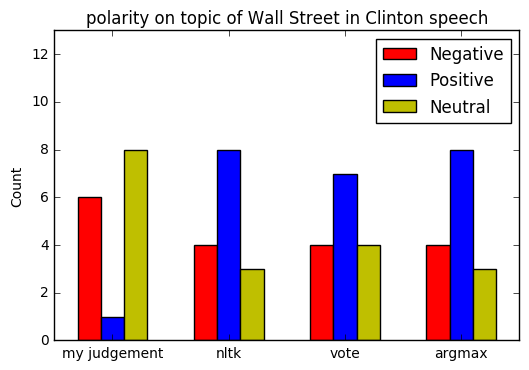

Correct: 4
Wrong: 11
Correct: 8
Wrong: 7
Correct: 4
Wrong: 11


In [8]:
#references to wall street
wall_cli = TopicList(clinton, 'wall street')

#filter out wall street journal
no_jc = []
for i in range(len(wall_cli)):
    if 'journal' not in wall_cli[i]:
        no_jc.append(wall_cli[i])
#print first 15
for i in range(0,15):
    print no_jc[i]
    print tb(no_jc[i]).sentiment.polarity
    print '\n'

me_c = [0,-1,-1,0,0,
        1,0,-1,-1,0,
        0,-1,0,0,-1]
prog_c = []
org_c = []

print 'my judgement:'
print me_c
#get polarity of first 15
for i in range(0,15):
    org_c.append(tb(no_jc[i]).sentiment.polarity)
#categorize pos, neg, nuetral first 15    
for j in range(len(org_c)):
    if org_c[j] > .1:
        prog_c.append(1)
    elif org_c[j] < -.1:
        prog_c.append(-1)
    else:
        prog_c.append(0)
print 'nltk:'    
print prog_c



#vote categorization
vote_c = []
for i in range(0,15):
    words = word_tokenize(no_jc[i])
    pos = 0
    neg = 0
    nu = 0
    for word in words:
        if tb(word).sentiment.polarity > 0:
            pos += 1
        if tb(word).sentiment.polarity < 0:
            neg += 1
    if pos > neg:
        vote_c.append(1)
    if neg > pos:
        vote_c.append(-1)
    if neg == pos:
        vote_c.append(0)
print 'vote:'
print vote_c

#argmax categorization
arg_c = []
for i in range(0,15):
    words = word_tokenize(no_jc[i])
    ran = []
    for word in words:
        ran.append(tb(word).sentiment.polarity)
    high = max(ran)
    low = min(ran)
    if abs(high) > abs(low):
        arg_c.append(1)
    if abs(low) > abs(high):
        arg_c.append(-1)
    if abs(high) == abs(low):
        arg_c.append(0)
print 'arg: '
print arg_c


#graph comparisons of all polarity methods 
N = 4

neg = [6,4,4,4]
pos = [1,8,7,8,]
nu = [8,3,4,3]

ind = np.arange(N)  
width = .2   

fig, ax = plt.subplots()
negative = ax.bar(ind+width, neg, width, color='r')
positive = ax.bar(ind+width*2, pos, width, color='b')
neutral = ax.bar(ind+width*3, nu, width, color='y')


ax.set_ylabel('Count')
ax.set_title('polarity on topic of Wall Street in Clinton speech')
ax.set_xticks(ind + width + .3)
plt.ylim(0,13)
ax.set_xticklabels(('my judgement', 'nltk', 'vote','argmax'))

ax.legend((negative[0], positive[0], neutral[0]), ('Negative', 'Positive','Neutral'))

plt.show()


types_c = [prog_c,vote_c,arg_c]
for word in types_c:
    correct_c = 0
    wrong_c = 0

    for i in range(len(me_c)):
        if me_c[i] == word[i]:
            correct_c += 1
        else:
            wrong_c += 1
    print ('Correct: ' + str(correct_c))
    print ('Wrong: ' + str(wrong_c))

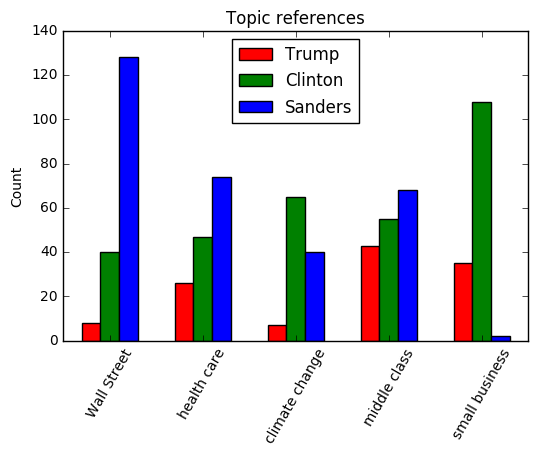

In [12]:
#graphing frequency of common policy topics
N = 5

t = [8,len(TopicList(trump, 'Health Care')),
     len(TopicList(trump, 'Climate Change')),
     len(TopicList(trump, 'Middle Class')),len(TopicList(trump, 'small business'))]
s = [len(no_jbs),len(TopicList(sanders, 'Health Care'))
     ,len(TopicList(sanders, 'Climate Change')),
     len(TopicList(sanders, 'Middle Class')),len(TopicList(sanders, 'small business'))]
c = [len(no_jc),len(TopicList(clinton, 'Health Care')),
    len(TopicList(clinton, 'Climate Change')),
     len(TopicList(clinton, 'Middle Class')),len(TopicList(clinton, 'small business'))]

ind = np.arange(N)  
width = .2  

fig, ax = plt.subplots()
tru = ax.bar(ind+width, t, width, color='r')
cli = ax.bar(ind+width*2, c, width, color='g')
sand = ax.bar(ind+width*3, s, width, color='b')


ax.set_ylabel('Count')
ax.set_title('Topic references')
ax.set_xticks(ind + width + .3)

ax.set_xticklabels(('Wall Street', 'health care','climate change','middle class',
                    'small business'),rotation = 60)

ax.legend((tru[0], cli[0], sand[0]), ('Trump', 'Clinton','Sanders'),loc = 'upper center')

plt.show()


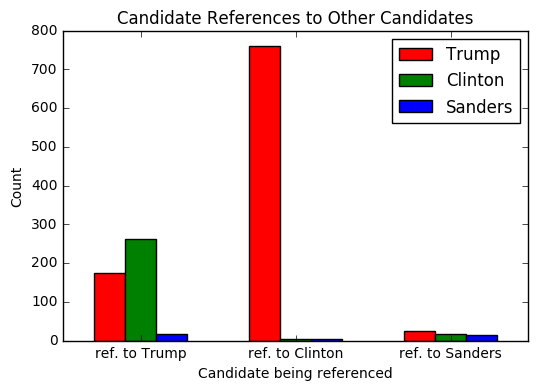

In [10]:
#graphing frequency candidates mentioned other candidates (or themselves)
N = 3

t = [len(TopicList(trump, 'Donald Trump')),len(TopicList(trump, 'Hillary Clinton')),
     len(TopicList(trump, 'Bernie Sanders'))]
c = [len(TopicList(clinton, 'Donald Trump')),len(TopicList(clinton, 'Hillary Clinton')),
     len(TopicList(clinton, 'Bernie Sanders'))]
s = [len(TopicList(sanders, 'Donald Trump')),len(TopicList(sanders, 'Hillary Clinton')),
     len(TopicList(sanders, 'Bernie Sanders'))]

ind = np.arange(N)  # the x locations for the groups
width = .2   # the width of the bars

fig, ax = plt.subplots()
tru = ax.bar(ind+width, t, width, color='r')
cli = ax.bar(ind+width*2, c, width, color='g')
sand = ax.bar(ind+width*3, s, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xlabel('Candidate being referenced')
ax.set_title('Candidate References to Other Candidates')
ax.set_xticks(ind + width + .3)

ax.set_xticklabels(('ref. to Trump','ref. to Clinton','ref. to Sanders'),rotation = 0)

ax.legend((tru[0], cli[0], sand[0]), ('Trump', 'Clinton','Sanders'),loc = 'best')

plt.show()


In [11]:
#count of total references analyzed 

print (8 + len(TopicList(trump, 'Health Care'))+len(TopicList(trump, 'Climate Change'))+
     len(TopicList(trump, 'Middle Class'))+len(TopicList(trump, 'small business')))
print (len(no_jbs) + len(TopicList(sanders, 'Health Care'))
     +len(TopicList(sanders, 'Climate Change'))+
     len(TopicList(sanders, 'Middle Class'))+len(TopicList(sanders, 'small business')))
print (len(no_jc)+len(TopicList(clinton, 'Health Care'))+
    len(TopicList(clinton, 'Climate Change'))+
     len(TopicList(clinton, 'Middle Class'))+len(TopicList(clinton, 'small business')))

119
312
315
